In [13]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [14]:
file_path = "dataset_rumit.csv"
df = pd.read_csv(file_path)
df.head()

,Transaction_ID,Customer_ID,Product_ID,Product_Name,Order_Date,Quantity,Price,Discount,Total_Amount ((harga x jumlah) - diskon),Payment_Method,Delivery_City,Delivery_Status
0,1001,10034,2022,NASI GORENG,2023-01-01 00:00:00,1,48402,0,NaN,Credit Card,Bandung,Pending
1,1002,10032,2048,Nasi Goreng,2023-01-02 00:00:00,7,35841,5000,NaN,E-Wallet,Surabaya,Delivered
2,1003,10029,2004,Ayam Bakar,2023-01-03 00:00:00,5,29269,5000,NaN,E-Wallet,Yogyakarta,Canceled
3,1003,10029,2004,Ayam Bakar,2023-01-03 00:00:00,5,29269,5000,NaN,E-Wallet,Yogyakarta,Canceled
4,1004,10042,2036,mie goreng,2023-01-04 00:00:00,9,12105,0,NaN,Bank Transfer,Medan,Canceled


# Preprocessing Data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction_ID                            58 non-null     int64  
 1   Customer_ID                               58 non-null     int64  
 2   Product_ID                                58 non-null     int64  
 3   Product_Name                              58 non-null     object 
 4   Order_Date                                58 non-null     object 
 5   Quantity                                  58 non-null     int64  
 6   Price                                     58 non-null     int64  
 7   Discount                                  58 non-null     int64  
 8   Total_Amount ((harga x jumlah) - diskon)  0 non-null      float64
 9   Payment_Method                            58 non-null     object 
 10  Delivery_City                           

Terdapat kesalahan dalam format data pada kolom **Order Date**, yang saat ini bertipe **Object**, padahal seharusnya bertipe **datetime**. Selain itu, kolom **Total_Amount**, yang seharusnya berisi hasil perhitungan (**harga × jumlah** - **diskon**), namun masih kosong.

In [16]:
# Menghitung ulang kolom Total_Amount
df["Total_Amount"] = (df["Price"] * df["Quantity"]) - df["Discount"]

# Mengkonversi kolom Order_Date ke format datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

# Menangani inkonsistensi nama produk (mengubah ke format title case)
df["Product_Name"] = df["Product_Name"].str.title()

# Menghapus duplikasi berdasarkan Transaction_ID & Customer_ID jika ada
df = df.drop_duplicates(subset=["Transaction_ID", "Customer_ID"], keep="first")
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 57
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Transaction_ID                            50 non-null     int64         
 1   Customer_ID                               50 non-null     int64         
 2   Product_ID                                50 non-null     int64         
 3   Product_Name                              50 non-null     object        
 4   Order_Date                                50 non-null     datetime64[ns]
 5   Quantity                                  50 non-null     int64         
 6   Price                                     50 non-null     int64         
 7   Discount                                  50 non-null     int64         
 8   Total_Amount ((harga x jumlah) - diskon)  0 non-null      float64       
 9   Payment_Method                         

(None,
    Transaction_ID  Customer_ID  Product_ID Product_Name Order_Date  Quantity  \
 0            1001        10034        2022  Nasi Goreng 2023-01-01         1   
 1            1002        10032        2048  Nasi Goreng 2023-01-02         7   
 2            1003        10029        2004   Ayam Bakar 2023-01-03         5   
 4            1004        10042        2036   Mie Goreng 2023-01-04         9   
 5            1005        10025        2013   Ikan Bakar 2023-01-05         1   
 
    Price  Discount  Total_Amount ((harga x jumlah) - diskon) Payment_Method  \
 0  48402         0                                       NaN    Credit Card   
 1  35841      5000                                       NaN       E-Wallet   
 2  29269      5000                                       NaN       E-Wallet   
 4  12105         0                                       NaN  Bank Transfer   
 5  36316     10000                                       NaN  Bank Transfer   
 
   Delivery_City Delive

Permasalahan data diatasi dengan menghitung ulang Total_Amount, mengonversi Order_Date ke format datetime, serta menyelaraskan Product_Name ke format title case. Selain itu, duplikasi berdasarkan Transaction_ID dan Customer_ID dihapus, lalu hasil perbaikan diverifikasi menggunakan df.info() dan df.head().

In [17]:
# Menghapus kolom lama yang bermasalah
df = df.drop(columns=["Total_Amount ((harga x jumlah) - diskon)"], errors="ignore")
print(df.head())

   Transaction_ID  Customer_ID  Product_ID Product_Name Order_Date  Quantity  \
0            1001        10034        2022  Nasi Goreng 2023-01-01         1   
1            1002        10032        2048  Nasi Goreng 2023-01-02         7   
2            1003        10029        2004   Ayam Bakar 2023-01-03         5   
4            1004        10042        2036   Mie Goreng 2023-01-04         9   
5            1005        10025        2013   Ikan Bakar 2023-01-05         1   

   Price  Discount Payment_Method Delivery_City Delivery_Status  Total_Amount  
0  48402         0    Credit Card       Bandung         Pending         48402  
1  35841      5000       E-Wallet      Surabaya       Delivered        245887  
2  29269      5000       E-Wallet    Yogyakarta        Canceled        141345  
4  12105         0  Bank Transfer         Medan        Canceled        108945  
5  36316     10000  Bank Transfer      Surabaya        Canceled         26316  


Kolom lama yang bermasalah dihapus menggunakan `drop(columns=["Total_Amount ((harga x jumlah) - diskon)"], errors="ignore")` untuk menghindari error jika kolom tidak ditemukan. Setelah itu, hasil perubahan diperiksa dengan `print(df.head())` guna memastikan data telah diperbarui dengan benar.

# Exploratory Data Analysis

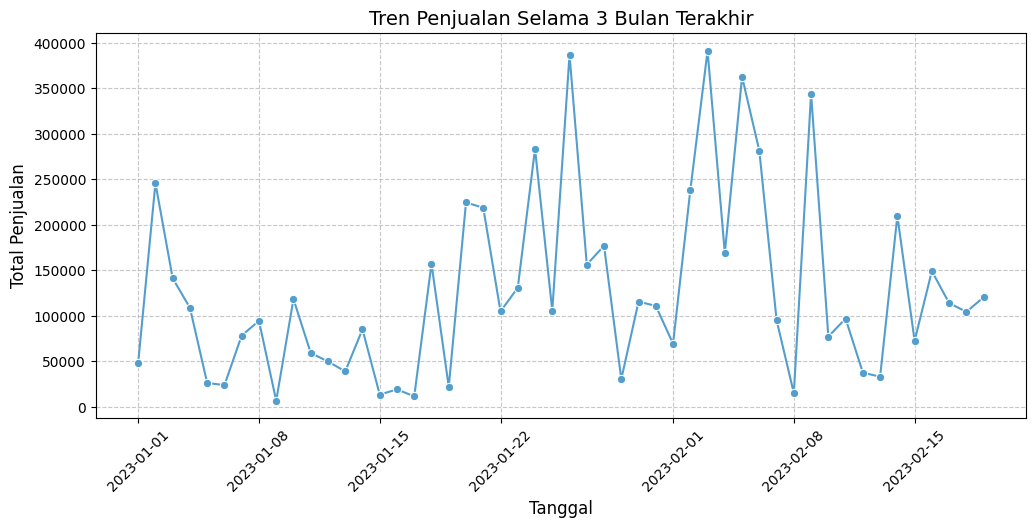

In [18]:
# Filter data untuk 3 bulan terakhir
df_recent = df[df["Order_Date"] >= df["Order_Date"].max() - pd.DateOffset(months=3)]

# Agregasi total penjualan per hari
sales_trend = df_recent.groupby("Order_Date")["Total_Amount"].sum().reset_index()

# Visualisasi tren penjualan
plt.figure(figsize=(12, 5))
sns.lineplot(x="Order_Date", y="Total_Amount", data=sales_trend, marker="o", linestyle="-", color=sns.color_palette("Blues_r")[2])
plt.title("Tren Penjualan Selama 3 Bulan Terakhir", fontsize=14)
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Total Penjualan", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

 Hasil analisis menunjukkan tren penjualan selama 3 bulan terakhir yang menunjukkan lonjakan tertinggi terjadi pada beberapa waktu di bulan Februari, dengan total penjualan hampir mencapai 400.000.

Total Penjualan Keseluruhan: 6,380,302.00 IDR
Rata-rata Penjualan per Hari: 127,606.04 IDR
Produk Terlaris:
Product_Name
Nasi Goreng    1794143
Sate Ayam      1539904
Mie Goreng     1225214
Ikan Bakar     1182776
Ayam Bakar      638265
Name: Total_Amount, dtype: int64


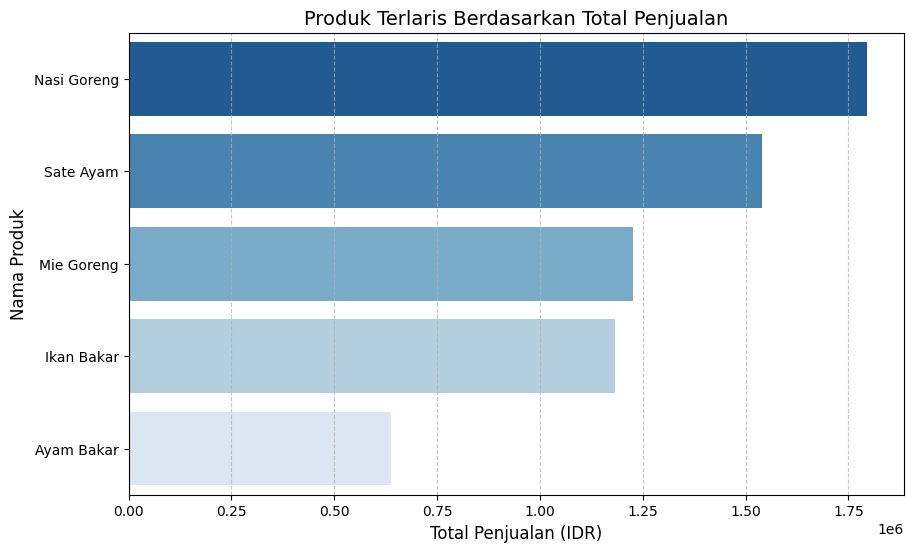

In [30]:
#Menghitung total penjualan terlaris
total_sales = df["Total_Amount"].sum()
average_sales_per_day = df.groupby(df["Order_Date"].dt.date)["Total_Amount"].sum().mean()
product_sales = df.groupby("Product_Name")["Total_Amount"].sum()
top_products = product_sales.sort_values(ascending=False).head(5)  # Menampilkan 5 produk terlaris

# Menampilkan hasil
print(f"Total Penjualan Keseluruhan: {total_sales:,.2f} IDR")
print(f"Rata-rata Penjualan per Hari: {average_sales_per_day:,.2f} IDR")
print("Produk Terlaris:")
print(top_products)

# Visualisasi produk terlaris
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.title("Produk Terlaris Berdasarkan Total Penjualan", fontsize=14)
plt.xlabel("Total Penjualan (IDR)", fontsize=12)
plt.ylabel("Nama Produk", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

Analisis data menunjukkan bahwa total penjualan keseluruhan mencapai Rp6.380.302, dengan rata-rata penjualan harian sebesar Rp127.606. Produk dengan penjualan tertinggi adalah Nasi Goreng dengan total penjualan Rp1.794.143, diikuti oleh Sate Ayam sebesar Rp1.539.904, Mie Goreng Rp1.225.214, Ikan Bakar Rp1.182.776, dan Ayam Bakar Rp638.265. Data ini mengindikasikan bahwa menu berbasis nasi dan ayam mendominasi penjualan, sehingga strategi promosi dapat difokuskan pada produk-produk ini untuk meningkatkan keuntungan.

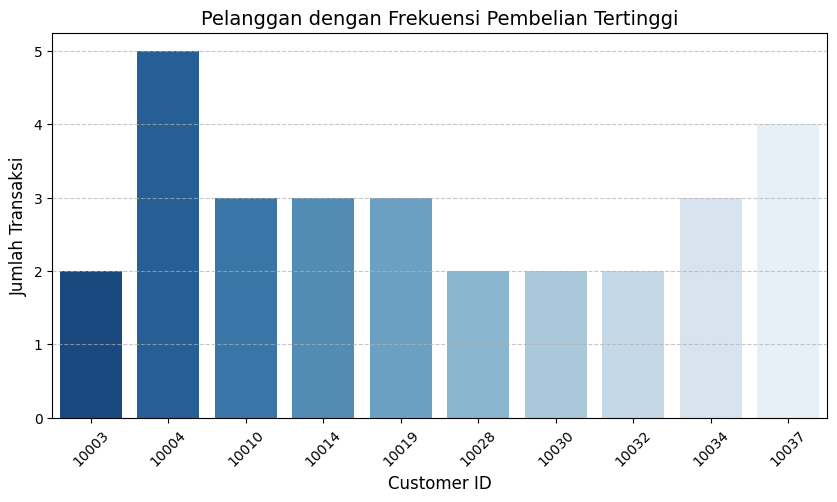

In [20]:
# Mengambil 10 pelanggan dengan transaksi terbanyak
top_customers = df["Customer_ID"].value_counts().head(10).reset_index()
top_customers.columns = ["Customer_ID", "Jumlah_Transaksi"]

# Visualisasi pelanggan dengan pembelian terbanyak
plt.figure(figsize=(10, 5))
sns.barplot(x="Customer_ID", y="Jumlah_Transaksi", data=top_customers, palette="Blues_r")
plt.title("Pelanggan dengan Frekuensi Pembelian Tertinggi", fontsize=14)
plt.xlabel("Customer ID", fontsize=12)
plt.ylabel("Jumlah Transaksi", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Analisis dilakukan untuk mengidentifikasi 10 pelanggan dengan transaksi terbanyak berdasarkan Customer_ID. Hasil analisis menunjukkan bahwa pelanggan dengan Customer ID 1004 memiliki frekuensi pembelian tertinggi, dengan total 5 transaksi. Hal ini menunjukkan loyalitas pelanggan yang tinggi dan potensi strategi retensi yang dapat diterapkan.

Segmentasi Pelanggan

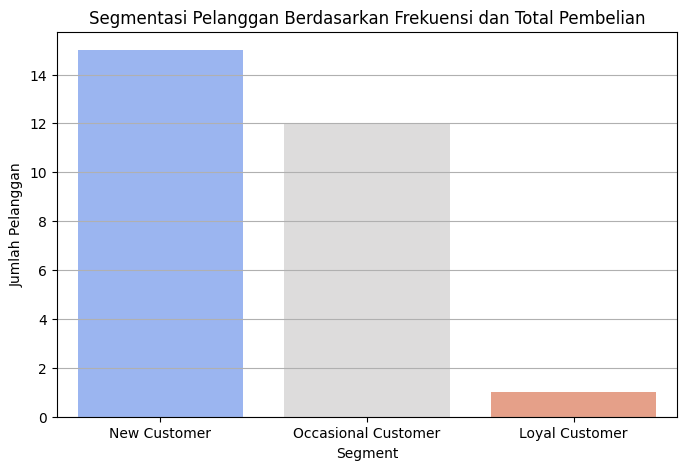

Jumlah Pelanggan per Segmen:
Segment
New Customer           15
Occasional Customer    12
Loyal Customer          1
Name: count, dtype: int64


In [21]:
# Menghitung jumlah transaksi dan total nilai pembelian per pelanggan
customer_segmentation = df.groupby("Customer_ID").agg(
    total_transactions=("Transaction_ID", "count"),
    total_spent=("Total_Amount", "sum")
).reset_index()

# Menentukan kategori segmentasi pelanggan
def categorize_customer(row):
    if row["total_transactions"] >= 5 and row["total_spent"] >= customer_segmentation["total_spent"].quantile(0.75):
        return "Loyal Customer"
    elif row["total_transactions"] == 1:
        return "New Customer"
    else:
        return "Occasional Customer"

customer_segmentation["Segment"] = customer_segmentation.apply(categorize_customer, axis=1)

# Menampilkan distribusi pelanggan dalam setiap segmen
segment_counts = customer_segmentation["Segment"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values, palette="coolwarm")
plt.title("Segmentasi Pelanggan Berdasarkan Frekuensi dan Total Pembelian")
plt.xlabel("Segment")
plt.ylabel("Jumlah Pelanggan")
plt.grid(axis="y")
plt.show()

# Menampilkan hasil segmentasi
print("Jumlah Pelanggan per Segmen:")
print(segment_counts)

Hasil analisis menunjukkan bahwa New Customer adalah pelanggan yang hanya melakukan satu transaksi, sementara Loyal Customer adalah pelanggan dengan transaksi ≥5 serta total pembelian tinggi (di atas kuartil ke-75). Visualisasi menunjukkan bahwa sebagian besar pelanggan termasuk dalam kategori New Customer, menandakan adanya peluang untuk meningkatkan retensi pelanggan melalui strategi pemasaran yang lebih efektif.

### **Analisis Pola Pembelian Pelanggan**

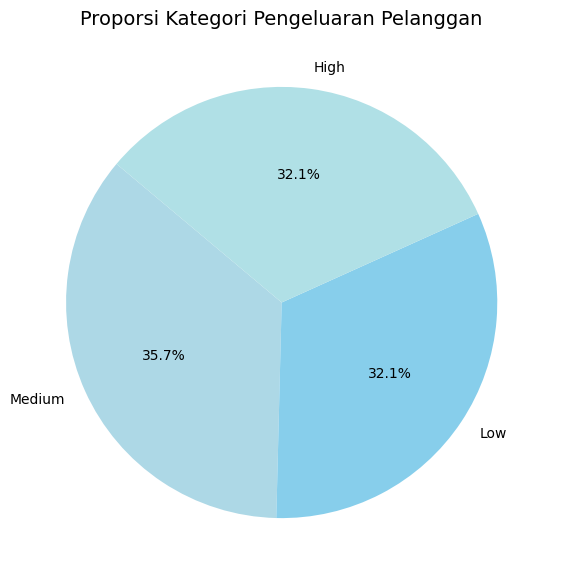

In [23]:
# Mengelompokkan data berdasarkan Customer_ID dan menghitung total pengeluaran setiap pelanggan
customer_spending = df.groupby("Customer_ID")["Total_Amount"].sum().reset_index()

# Mengkategorikan total pengeluaran ke dalam tiga kategori (Low, Medium, High)
customer_spending["Spending_Category"] = pd.qcut(customer_spending["Total_Amount"], q=3, labels=["Low", "Medium", "High"])

# Menghitung jumlah pelanggan dalam setiap kategori pengeluaran # This line was added
category_counts = customer_spending["Spending_Category"].value_counts()

#Visualisasi
plt.figure(figsize=(7, 7))
colors = ["#ADD8E6", "#87CEEB", "#B0E0E6"]

# Menggunakan category_counts yang telah dihitung # Updated this line
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Menambahkan judul
plt.title("Proporsi Kategori Pengeluaran Pelanggan", fontsize=14)
plt.show()

Visualisasi PieChart menunjukkan bahwa kategori pengeluaran 'Medium' memiliki proporsi terbesar, yaitu 35,7%, sementara kategori 'High' dan 'Low' masing-masing memiliki proporsi yang sama, yaitu 32,1%.

### **Analisis Metode Pembayaran yang digunakan**

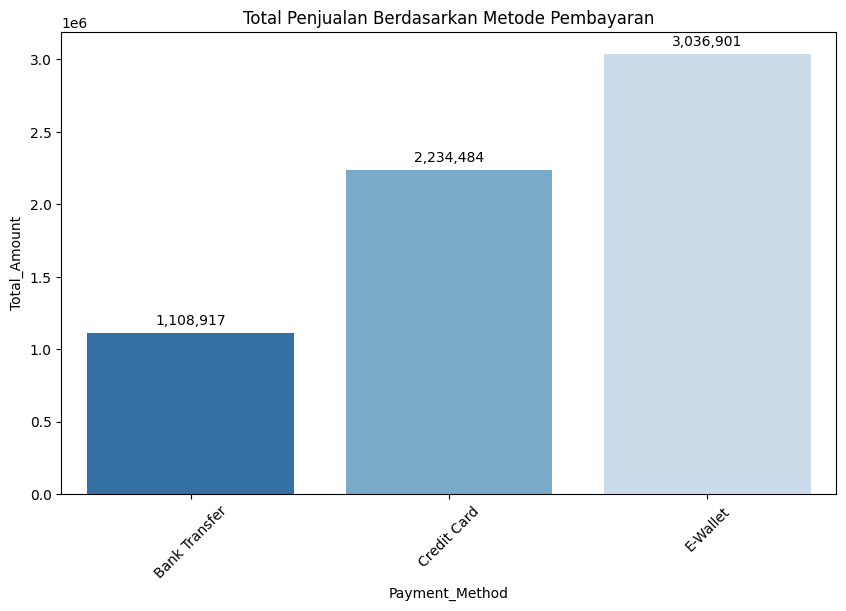

In [24]:
# Mengelompokkan data berdasarkan metode pembayaran dan menghitung total penjualan
payment_analysis = df.groupby("Payment_Method")["Total_Amount"].sum().reset_index()

# Membuat plot batang
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x="Payment_Method", y="Total_Amount", data=payment_analysis, palette="Blues_r")

# Menambahkan judul dan memutar label sumbu x
plt.title("Total Penjualan Berdasarkan Metode Pembayaran")
plt.xticks(rotation=45)

# Menampilkan nilai total penjualan di atas setiap batang sebagai bilangan bulat
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}',  # Format angka dengan koma sebagai pemisah ribuan
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

Analisis total penjualan berdasarkan metode pembayaran menunjukkan bahwa e-payment melalui e-wallet mendominasi dengan total penjualan sebesar Rp3.036.901. Metode pembayaran menggunakan kartu kredit menyusul dengan total penjualan sebesar Rp2.234.484, sementara transfer bank memiliki total penjualan sebesar Rp1.108.917.

### **Analisis kota dengan Penjualan tertinggi**

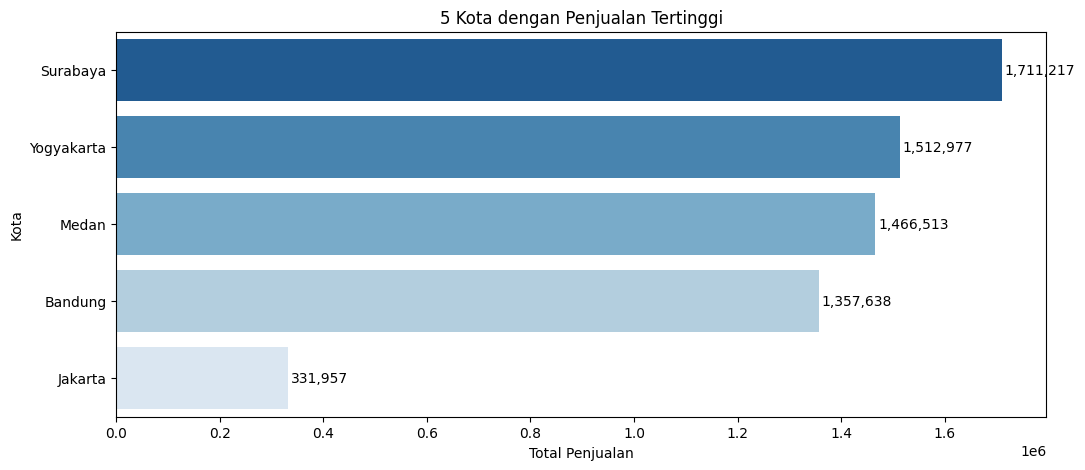

In [25]:
# Mengelompokkan data berdasarkan kota pengiriman dan menghitung total penjualan
city_sales = df.groupby("Delivery_City")["Total_Amount"].sum().sort_values(ascending=False).reset_index()

# Membuat plot batang horizontal
plt.figure(figsize=(12, 5))
bar_plot = sns.barplot(x="Total_Amount", y="Delivery_City", data=city_sales.head(10), palette="Blues_r")

# Menambahkan judul dan label sumbu
plt.title("5 Kota dengan Penjualan Tertinggi")
plt.xlabel("Total Penjualan")
plt.ylabel("Kota")

# Menampilkan nilai total penjualan
for p in bar_plot.patches:
    plt.text(p.get_width() + 5000,
             p.get_y() + p.get_height() / 2,
             f'{int(p.get_width()):,}',
             ha='left', va='center')

plt.show()

Analisis total penjualan per kota menunjukkan bahwa Surabaya memiliki transaksi tertinggi dengan total penjualan sebesar Rp1.711.217, diikuti oleh Yogyakarta dengan Rp1.512.977, Medan dengan Rp1.466.513, Bandung dengan Rp1.357.638, dan Jakarta dengan Rp331.957.

### **Analisis status pengiriman**

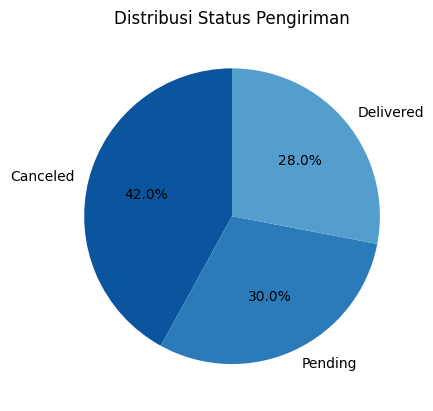

In [26]:
delivery_status_counts = df["Delivery_Status"].value_counts(normalize=True) * 100
delivery_status_counts.plot(kind="pie", autopct="%.1f%%", colors=sns.color_palette("Blues_r"), startangle=90)
plt.title("Distribusi Status Pengiriman")
plt.ylabel("")
plt.show()

Visualisasi PieChart yang dihasilkan menunjukkan distribusi status pengiriman dengan proporsi sebagai berikut: 'Canceled' sebesar 42%, 'Pending' 30%, dan 'Delivered' 28%. Hal ini mengindikasikan bahwa sebagian besar pesanan tidak berhasil dikirimkan, dengan persentase pembatalan yang tinggi. Selain itu, terdapat sejumlah pesanan yang masih dalam status penundaan, sementara hanya sebagian kecil yang berhasil dikirimkan kepada pelanggan.

Perbandingan Penjualan Hari Kerja vs Akhir Pekan

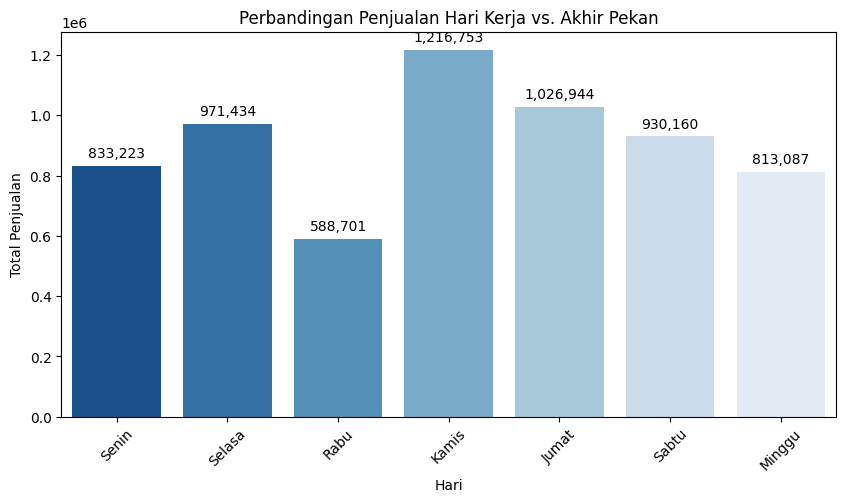

In [27]:
# Menambahkan kolom 'Day_of_Week' ke DataFrame
df["Day_of_Week"] = df["Order_Date"].dt.dayofweek

# Mengelompokkan data berdasarkan 'Day_of_Week' dan menghitung total penjualan
sales_by_day = df.groupby("Day_of_Week")["Total_Amount"].sum().reset_index()

# Mendefinisikan nama hari dalam bahasa Indonesia
days = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat", "Sabtu", "Minggu"]

# Mengubah nilai numerik 'Day_of_Week' menjadi nama hari
sales_by_day["Day_of_Week"] = sales_by_day["Day_of_Week"].apply(lambda x: days[x])

# Mengurutkan data berdasarkan urutan hari dalam seminggu
sales_by_day["Day_of_Week"] = pd.Categorical(sales_by_day["Day_of_Week"], categories=days, ordered=True)
sales_by_day = sales_by_day.sort_values("Day_of_Week")

# Visualisasi barplot
plt.figure(figsize=(10, 5))
bar_plot = sns.barplot(x="Day_of_Week", y="Total_Amount", data=sales_by_day, palette="Blues_r")
plt.title("Perbandingan Penjualan Hari Kerja vs. Akhir Pekan")
plt.xlabel("Hari")
plt.ylabel("Total Penjualan")
plt.xticks(rotation=45)

# Menampilkan nilai total penjualan
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height()):,}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

Analisis total penjualan harian menunjukkan bahwa Kamis memiliki penjualan tertinggi sebesar Rp1.216.753, diikuti oleh Jumat dengan Rp1.026.944, dan Selasa dengan Rp971.434. Penjualan pada Sabtu mencapai Rp930.160, sementara Senin dan Minggu masing-masing mencatat Rp833.233 dan Rp813.087. Penjualan terendah terjadi pada Rabu, yaitu sebesar Rp588.701. Data ini menunjukkan bahwa penjualan cenderung meningkat menjelang akhir pekan, dengan puncaknya pada hari Kamis.